In [12]:
from toolbar.masked import masked
import xarray as xr
from eofs.standard import Eof
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [22]:
gpcp = xr.open_dataset(r'E:\data\NOAA\GPCP\precip.mon.mean.nc')
india_gpcp = masked(gpcp['precip'], r"C:\Users\86136\Desktop\India0\gadm41_IND_0.shp")
india_gpcp = india_gpcp.loc[india_gpcp.time.dt.month.isin([6,7,8,9])].loc['1990':'2010'].groupby('time.year').sum(dim='time')

In [23]:
# 计算EOF
eof = Eof(india_gpcp.to_numpy())  #进行eof分解
Modality = eof.eofs(eofscaling=2, neofs=3)  # 得到空间模态U eofscaling 对得到的场进行放缩 （1为除以特征值平方根，2为乘以特征值平方根，默认为0不处理） neofs决定输出的空间模态场个数
PC = eof.pcs(pcscaling=1, npcs=3)  # 同上 npcs决定输出的时间序列个数
s = eof.varianceFraction(neigs=3)  # 得到前neig个模态的方差贡献

C:\Users\86136\AppData\Local\Temp\ipykernel_15072\128804893.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  eof = Eof(india_gpcp.to_numpy())  #进行eof分解


In [28]:
s

array([0.29506472, 0.17205128, 0.14224288], dtype=float32)

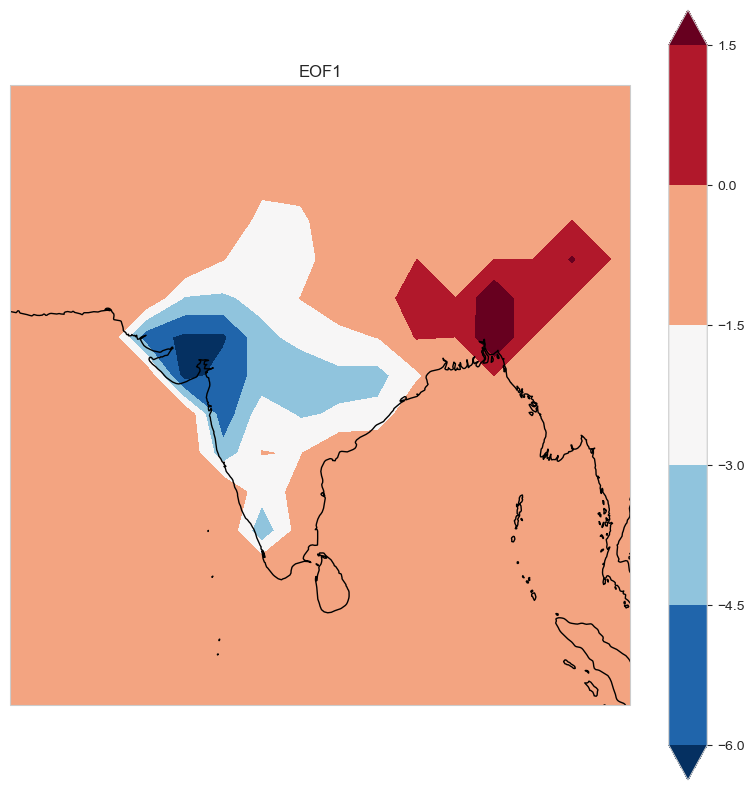

In [30]:
# 绘制EOF图
fig = plt.figure(figsize=(10, 10))
proj = ccrs.PlateCarree()
ax = fig.add_subplot(111, projection=proj)
ax.set_extent([60, 100, 0, 40], crs=proj)
ax.coastlines()
ax.set_title('EOF1')
Modality1 = Modality[0, :, :]
a = ax.contourf(india_gpcp.lon, india_gpcp.lat, Modality1, transform=proj, cmap='RdBu_r', extend='both')
plt.colorbar(a)
plt.show()